In [138]:
import os
import pyshearlab
import pyshearlab
import numpy as np
from time import time
import pymatreader as pymat
from termcolor import colored
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
path_str = os.getcwd()
data_name_str, gt_name_str = 'Majazi1.mat', 'Majazi1_gt.mat'
path_data_str, path_gt_str = os.path.join(path_str, data_name_str), os.path.join(path_str, gt_name_str)

In [3]:
data = pymat.read_mat(path_data_str)['Botswana']
data_gt = pymat.read_mat(path_gt_str)['Botswana_gt']

$\newline$
$\newline$
- [ ] <a name=''>$\bf{\text{Task 1:}}$</a>
$\newline$
$\newline$

$\newline$
$\newline$
- - <a name=''>$\bf{\text{Backgroun Removing}}$</a>
$\newline$
$\newline$

In [4]:
def BG_removal(data_3D: np.ndarray, data_gt_2D: np.ndarray) -> (np.ndarray, np.ndarray):
    data_copy = data_3D.copy()
    gt_copy = data_gt_2D.copy()
    
    data_reshaped = data_copy.reshape((data_copy.shape[0] * data_copy.shape[1], data_copy.shape[2]))
    gt_reshaped = gt_copy.ravel()
    classes_unique = np.unique(gt_reshaped)
    new_data = data_reshaped[gt_reshaped != 0]
    new_gt = gt_reshaped[gt_reshaped != 0]
    
    return new_data, new_gt

In [5]:
data_without_BG, gt_without_BG = BG_removal(data_3D=data, data_gt_2D=data_gt)
D = data_without_BG.shape[1]
print(f'\nNumber of Bands: {colored(D, "blue")}\n')


Number of Bands: 145



In [6]:
print(f'\nShape of the BG_removed Data: {colored(data_without_BG.shape, "blue")}\n')
print(f' ... and its {colored("Data Type", "blue")}: {colored(data_without_BG.dtype, "green")}\n\n')
print(f'\nShape of the BG_removed GT: {colored(gt_without_BG.shape, "blue")}\n')
print(f' ... and its {colored("Data Type", "blue")}: {colored(gt_without_BG.dtype, "green")}\n')


Shape of the BG_removed Data: (3248, 145)

 ... and its Data Type: uint16



Shape of the BG_removed GT: (3248,)

 ... and its Data Type: uint8



$\newline$
$\newline$
- [x] <a name=''>$\bf{\text{End of the Task 1}}$</a>
$\newline$
$\newline$

$\newline$
$\newline$
- [ ] <a name=''>$\bf{\text{Task 2:}}$</a>
$\newline$
$\newline$

$\newline$
$\newline$
- - <a name=''>$\bf{\text{Data Separatting}}$</a>
$\newline$
$\newline$

In [7]:
def class_separator(X: np.ndarray, y: np.ndarray) -> dict:
    
    unique_labels = np.unique(y)
    total_data = {}
    for class_name in unique_labels:
        total_data[str(class_name)], total_data[str(class_name) + '_label'] = \
        X[y == class_name], y[y == class_name]
        
        
    return total_data



def train_test_for_each_class(X: np.ndarray, y: np.ndarray, train_size_float: float) -> (dict, dict):
    
    splitter = train_test_split
    data = class_separator(X, y)
    num_classes = int(len(data) / 2)
    train_data, test_data = {}, {}
    for class_name in range(1, num_classes + 1):
        train_data[str(class_name)], test_data[str(class_name)], train_data[str(class_name) + '_label'], \
        test_data[str(class_name) + '_label'] = splitter(data[str(class_name)], \
                                            data[str(class_name) + '_label'], train_size=train_size_float, \
                                                        shuffle=True, random_state=0)
        
    return train_data, test_data


def train_test_splitter(X: np.ndarray, y: np.ndarray, train_size_floatt: float) -> \
(np.ndarray, np.ndarray, np.ndarray, np.ndarray):
    
    data_train, data_test = train_test_for_each_class(X, y, train_size_floatt)
    keys = list(data_train.keys())
    X_train, X_test, y_train, y_test = data_train[keys[0]], \
    data_test[keys[0]], data_train[keys[1]], data_test[keys[1]]
    
    re_keys = keys[2:]
    n = int(len(re_keys) / 2)
    for i in range(n):
        X_train, X_test, y_train, y_test = np.concatenate((X_train, data_train[re_keys[2*i]]), axis=0), \
        np.concatenate((X_test, data_test[re_keys[2*i]]), axis=0), \
        np.concatenate((y_train, data_train[re_keys[2*i + 1]])), \
        np.concatenate((y_test, data_test[re_keys[2*i + 1]]))
        
    
    return X_train, X_test, y_train, y_test

In [8]:
train_size_list = [0.1]
data = {}
for train_size_float in train_size_list: data['X_train_' + str(train_size_float)], \
    data['X_test_' + \
    str(train_size_float)], data['y_train_' + str(train_size_float)], \
    data['y_test_' + str(train_size_float)] = \
    train_test_splitter(data_without_BG, gt_without_BG, train_size_floatt=train_size_float)
#     train_test_split(data_without_BG, gt_without_BG, train_size=train_size_float, \
#                     shuffle=True, random_state=0)

In [9]:
train_size = 0.1
X_train, X_test, y_train, y_test = data['X_train_' + str(train_size)], data['X_test_' + str(train_size)], \
data['y_train_' + str(train_size)], data['y_test_' + str(train_size)]

In [10]:
print(f'\nShape of the {colored("X_train", "green")}: {colored(X_train.shape, "blue")}\n')
print(f'Shape of the {colored("y_train", "green")}: {colored(y_train.shape, "blue")}\n\n')
print(f'\nShape of the {colored("X_test", "green")}: {colored(X_test.shape, "blue")}\n')
print(f'Shape of the {colored("y_test", "green")}: {colored(y_test.shape, "blue")}\n')


Shape of the X_train: (318, 145)

Shape of the y_train: (318,)



Shape of the X_test: (2930, 145)

Shape of the y_test: (2930,)



$\newline$
$\newline$
- [x] <a name=''>$\bf{\text{End of the Task 2}}$</a>
$\newline$
$\newline$

$\newline$
$\newline$
- [ ] <a name=''>$\bf{\text{Task 3:}}$</a>
$\newline$
$\newline$

$\newline$
$\newline$
- - <a name=''>$\bf{\text{Creating Noisy Data}}$</a>
$\newline$
$\newline$

In [11]:
import matplotlib.pyplot as plt
from skimage.util import random_noise
from skimage.metrics import peak_signal_noise_ratio, mean_squared_error

In [12]:
def min_max_scaler(input_img: np.ndarray, data_range: tuple=(0, 1)) -> np.ndarray:
    img = input_img.copy()
    a, b = data_range[0], data_range[1]
    img = (img - img.min()) / (img.max() - img.min())
    img *= (b - a)
    img += a
    return img

In [13]:
data = pymat.read_mat(path_data_str)['Botswana']
data_gt = pymat.read_mat(path_gt_str)['Botswana_gt']

In [14]:
data_without_BG, gt_without_BG = BG_removal(data_3D=data, data_gt_2D=data_gt)

In [15]:
print(f'\nShape of BG_removed Data: {colored(data_without_BG.shape, "blue")}\n')
print(f' ... and its Data Type: {colored(data_without_BG.dtype, "blue")}\n')
print(f'\nShape of BG_removed GT: {colored(gt_without_BG.shape, "blue")}\n')
print(f' ... and its Data Type: {colored(gt_without_BG.dtype, "blue")}\n')


Shape of BG_removed Data: (3248, 145)

 ... and its Data Type: uint16


Shape of BG_removed GT: (3248,)

 ... and its Data Type: uint8



In [16]:
scaler = min_max_scaler
data_scaled, gt_scaled = scaler(data_without_BG), gt_without_BG

In [17]:
print(f'\nShape of Scaled Data: {colored(data_scaled.shape, "blue")}\n')
print(f' ... and its Data Type: {colored(data_scaled.dtype, "blue")}\n')
print(f'\nShape of Scaled GT: {colored(gt_scaled.shape, "blue")}\n')
print(f' ... and its Data Type: {colored(gt_scaled.dtype, "blue")}\n')


Shape of Scaled Data: (3248, 145)

 ... and its Data Type: float64


Shape of Scaled GT: (3248,)

 ... and its Data Type: uint8



- - - <a name=''>${\bf{\text{Poisson Noise:}}}$</a>

In [18]:
# np.random.seed(0)
# lamb = 0.0001
# N = np.random.poisson(lam=lamb, size=(shape[0], shape[1]))
# N = N.astype(np.float64)
# print(f'\nShape of the {colored("Poisson Noise", "blue")}: {N.shape}')
# print(f'\n ... and its Data Type: {colored(N.dtype, "blue")}\n\n')

# print(f'\nMean(\u03BB) of the {colored("Poisson Noise", "blue")}: {N.mean(): 0.4f}\n')
# print(f'\nVar(\u03BB) of the {colored("Poisson Noise", "blue")}: {N.var(): 0.4f}\n')
# print(f'\nMin of the {colored("Poisson Noise", "blue")}: {N.min(): 0.4f}\n')
# print(f'\nMax of the {colored("Poisson Noise", "blue")}: {N.max(): 0.4f}\n')

- - - <a name=''>${\bf{\text{Spike Noise:}}}$</a>

- - - <a name=''>${\bf{\text{Gaussian Noise:}}}$</a>

In [19]:
# mu = 0
# sigma_2 = 0.001
# data_gaussian_noisy, gt_gaussian_noisy = random_noise(image=data_scaled, mode='gaussian', \
#                                                       seed=0, var=sigma_2, mean=mu), gt_scaled
# print(f'\nShape of the Gaussian Noisy Data: {colored(data_gaussian_noisy.shape, "blue")}')
# print(f'\n ... and its Data Type: {colored(data_gaussian_noisy.dtype, "blue")}\n')

In [18]:
mu, sigma = 0, 0.01
shape = data_scaled.shape
N = sigma * np.random.randn(shape[0], shape[1]) + mu

In [19]:
np.random.seed(0)
data_gaussian_noisy, gt_gaussian_noisy = data_scaled + N, gt_scaled

print(f'\nShape of the Gaussian Noisy Data: {colored(data_gaussian_noisy.shape, "blue")}')
print(f'\n ... and its Data Type: {colored(data_gaussian_noisy.dtype, "blue")}\n\n\n')

print(f'\n{colored("Mean", "blue")} of the {colored("Gaussian Noisy Data", "blue")}: \
{data_gaussian_noisy.mean(): 0.3f}')
print(f'\n{colored("Mean", "blue")} of the {colored("Data", "blue")}: {data_scaled.mean(): 0.3f}')
print(f'\n{colored("Mean", "blue")} of the {colored("Noise", "blue")}: {N.mean(): 0.3f}\n\n\n')

print(f'\n{colored("Var", "blue")} of the {colored("Gaussian Noisy Data", "blue")}: \
{data_gaussian_noisy.var(): 0.4f}')
print(f'\n{colored("Var", "blue")} of the {colored("Data", "blue")}: {data_scaled.var(): 0.4f}')
print(f'\n{colored("Var", "blue")} of the {colored("Noise", "blue")}: {N.var(): 0.4f}\n')


Shape of the Gaussian Noisy Data: (3248, 145)

 ... and its Data Type: float64




Mean of the Gaussian Noisy Data:  0.165

Mean of the Data:  0.165

Mean of the Noise:  0.000




Var of the Gaussian Noisy Data:  0.0216

Var of the Data:  0.0215

Var of the Noise:  0.0001



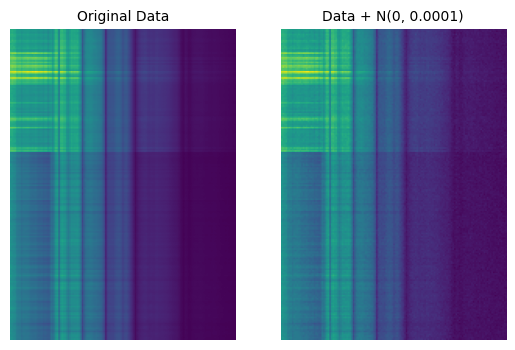

In [20]:
plt.figure(1, )
plt.subplot(1, 2, 1), plt.imshow(data_scaled[:200]), plt.axis('off'), \
plt.title('Original Data', fontsize=10)
plt.subplot(1, 2, 2, ), plt.imshow(data_gaussian_noisy[:200]), plt.axis('off'), \
plt.title(f'Data + N({mu}, {sigma**2})', fontsize=10)
plt.show()

$\newline$
$\newline$
- [x] <a name=''>$\bf{\text{End of the Task 3}}$</a>
$\newline$
$\newline$

$\newline$
$\newline$
- [ ] <a name=''>$\bf{\text{Task 4:}}$</a>
$\newline$
$\newline$

- - <a name=''>${\bf{\text{Denoising}}}$</a>

- - - <a name=''>${\bf{\text{Estimating the Variance of the Additive Noise:}}}$</a>

$\newline$
$\newline$
- - - <a name=''>$\bf{\color{green}{\text{How Can I Estimating the }\large{{\sigma^{2}_{N}}}}}$</a>
$\newline$
$\newline$
- > <a name=''>$\bf{\color{red}{Note:} \color{black}{\text{ if X(Data) and N(Additive Noise) be }\underline{\text{Independent }}\text{then:}}}$</a>
$\newline$
$\newline$
<a name=''>$\bf{\color{black}{Var({X_{noisy}})=Var(X) + Var(N)}}\;\;\rightarrow\;\;Var(N) = Var(X_{noisy}) - Var(X)$</a>
$\newline$
$\newline$
<a name=''>$\bf{\color{red}{\underline{\text{and that for each Type of Noise is True}}}}$</a>
$\newline$
$\newline$

In [21]:
X, Y = data_scaled, gt_scaled
X_noisy = data_gaussian_noisy

In [22]:
estimated_var_noise = X_noisy.var() - X.var()
print(f'\n{colored("Estimated Var", "blue")} for the Noise: {estimated_var_noise: 0.4f}\n')


Estimated Var for the Noise:  0.0001



$\newline$
- - - <a name=''>$\bf{\text{Hyperparameters}}$</a>
$\newline$

In [23]:
m, n = X.shape
selected_length = int(m / n)
x, y = X[: selected_length * n, :], Y[: selected_length * n]
x_noisy = X_noisy[: selected_length * n, :]
print(f'\nShape of X: {colored(x.shape, "blue")}\n')
print(f'\nShape of Noisy X: {colored(x_noisy.shape, "blue")}\n')
print(f'\nShape of y: {colored(y.shape, "blue")}\n')


Shape of X: (3190, 145)


Shape of Noisy X: (3190, 145)


Shape of y: (3190,)



In [24]:
# Best Scales is 1 or 2
best_scales = 2
# Best Thresholding Factor is 285
best_thresholding_factor = 285




			 Denoising




		  Elapsed Time:  2.351(s)


	                                PSNR:  92.521


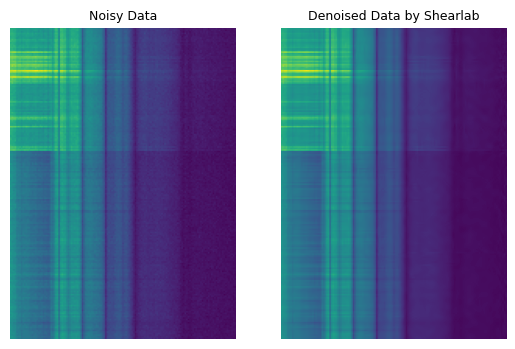

In [26]:
print(f'\n\n\n\t\t\t Denoising\n\n\n')

sigma = estimated_var_noise
scales = best_scales
thresholdingFactor = best_thresholding_factor



tic = time()

m, n = x_noisy.shape
X_rec_final = np.zeros((m, n), dtype=np.float64)
iterations = int(m / n)
PSNR_ndarray = np.zeros((iterations, ), dtype=np.float64)
shearletSystem = pyshearlab.SLgetShearletSystem2D(0, n, n, scales)

for i in range(iterations):
    f, g = n*i, n*(i + 1)
    X = x[f: g, :]
    X = X.astype(float)

    Xnoisy = x_noisy[f: g, :]

    coeffs = pyshearlab.SLsheardec2D(Xnoisy, shearletSystem)

    oldCoeffs = coeffs.copy()
    weights = np.ones(coeffs.shape)

    for j in range(len(shearletSystem["RMS"])):
        weights[:,:,j] = shearletSystem["RMS"][j]*np.ones((X.shape[0], X.shape[1]))
    
    coeffs = np.real(coeffs)
    zero_indices = np.abs(coeffs) / (thresholdingFactor * weights * sigma) < 1
    coeffs[zero_indices] = 0

    # reconstruction
    Xrec = pyshearlab.SLshearrec2D(coeffs, shearletSystem)
    X_rec_final[f: g, :] = Xrec
    PSNR = pyshearlab.SLcomputePSNR(X,Xrec)
    PSNR_ndarray[i] = PSNR


PSNR_mean = PSNR_ndarray.mean()
toc = time()
print(f'\n\t\t  {colored("Elapsed Time", "blue")}: {toc - tic: 0.3f}(s)\n')
# _____________________________________________________________________________________________________________
print(f'\n\t                                {colored("PSNR", "green")}: {PSNR_mean: 0.3f}')
plt.figure(1)
plt.subplot(1, 2, 1), plt.imshow(x_noisy[: 200]), plt.axis('off'), \
plt.title('Noisy Data', fontsize=9)

plt.subplot(1, 2, 2), plt.imshow(X_rec_final[: 200]), plt.axis('off'), \
plt.title('Denoised Data by Shearlab', fontsize=9)
# plt.colorbar()
plt.show()
print(f'\n\n\n\n')

In [27]:
data_denoised, y = X_rec_final, y
print(f'\nShape of the Denoised Data: {colored(data_denoised.shape, "blue")}\n')
print(f'Min of Denoised Data: {data_denoised.min(): 0.3f}\n')
print(f'Max of Denoised Data: {data_denoised.max(): 0.3f}\n')
print(f' ... and its Data Type: {colored(data_denoised.dtype, "blue")}\n')
print(f'\nShape of the y: {colored(y.shape, "blue")}\n')


Shape of the Denoised Data: (3190, 145)

Min of Denoised Data: -0.023

Max of Denoised Data:  1.000

 ... and its Data Type: float64


Shape of the y: (3190,)



$\newline$
$\newline$
- [x] <a name=''>$\bf{\text{End of the Task 4}}$</a>
$\newline$
$\newline$

- - - <a name=''>${\bf{\text{Splitting the Noisy Data}}}$</a>

In [29]:
train_size_list = [0.1]
data = {}
for train_size_float in train_size_list: data['X_train_' + str(train_size_float)], \
    data['X_test_' + \
    str(train_size_float)], data['y_train_' + str(train_size_float)], \
    data['y_test_' + str(train_size_float)] = \
    train_test_splitter(data_denoised, y, train_size_floatt=train_size_float)

In [30]:
train_size = 0.1
X_train, X_test, y_train, y_test = data['X_train_' + str(train_size)], data['X_test_' + str(train_size)], \
data['y_train_' + str(train_size)], data['y_test_' + str(train_size)]

In [31]:
print(f'\nShape of the {colored("X_train", "green")}: {colored(X_train.shape, "blue")}\n')
print(f'Min of the {colored("X_train", "green")}: {X_train.min(): 0.3f}\n')
print(f'Max of the {colored("X_train", "green")}: {X_train.max(): 0.3f}\n')
print(f'Shape of the {colored("y_train", "green")}: {colored(y_train.shape, "blue")}\n\n')
print(f'\nShape of the {colored("X_test", "green")}: {colored(X_test.shape, "blue")}\n')
print(f'Min of the {colored("X_test", "green")}: {X_test.min(): 0.3f}\n')
print(f'Max of the {colored("X_test", "green")}: {X_test.max(): 0.3f}\n')
print(f'Shape of the {colored("y_test", "green")}: {colored(y_test.shape, "blue")}\n')


Shape of the X_train: (313, 145)

Min of the X_train: -0.023

Max of the X_train:  0.786

Shape of the y_train: (313,)



Shape of the X_test: (2877, 145)

Min of the X_test: -0.022

Max of the X_test:  1.000

Shape of the y_test: (2877,)



$\newline$
$\newline$
<a name=''>$\large{\bf{\text{Feature Extraction by Using SWT}}}$</a>
$\newline$
$\newline$

In [32]:
import pywt

In [33]:
input_data = data_scaled

In [34]:
print(f'\nShape of Input Data: {colored(input_data.shape, "blue")}\n')
print(f' ... and Min of this: {colored(input_data.min(), "blue")}\n')
print(f' ... and Max of this: {colored(input_data.max(), "blue")}\n')
print(f' ... and its Data Type: {colored(input_data.dtype, "blue")}\n')


Shape of Input Data: (3248, 145)

 ... and Min of this: 0.0

 ... and Max of this: 1.0

 ... and its Data Type: float64



In [35]:
M = int(input_data.shape[0] ** 0.5)
d = D
HSI_input_data = input_data.reshape((M, -1, d))

In [36]:
print(f'\nShape of HSI Input Data: {colored(HSI_input_data.shape, "blue")}\n')


Shape of HSI Input Data: (56, 58, 145)



In [37]:
checking = np.unique(input_data[0, :] == HSI_input_data[0, 0, :])
print(f'\nChecking Result: {colored(checking, "blue")}\n')


Checking Result: [ True]



In [38]:
wavelet_list = list(pywt.wavelist())
print(wavelet_list)

['bior1.1', 'bior1.3', 'bior1.5', 'bior2.2', 'bior2.4', 'bior2.6', 'bior2.8', 'bior3.1', 'bior3.3', 'bior3.5', 'bior3.7', 'bior3.9', 'bior4.4', 'bior5.5', 'bior6.8', 'cgau1', 'cgau2', 'cgau3', 'cgau4', 'cgau5', 'cgau6', 'cgau7', 'cgau8', 'cmor', 'coif1', 'coif2', 'coif3', 'coif4', 'coif5', 'coif6', 'coif7', 'coif8', 'coif9', 'coif10', 'coif11', 'coif12', 'coif13', 'coif14', 'coif15', 'coif16', 'coif17', 'db1', 'db2', 'db3', 'db4', 'db5', 'db6', 'db7', 'db8', 'db9', 'db10', 'db11', 'db12', 'db13', 'db14', 'db15', 'db16', 'db17', 'db18', 'db19', 'db20', 'db21', 'db22', 'db23', 'db24', 'db25', 'db26', 'db27', 'db28', 'db29', 'db30', 'db31', 'db32', 'db33', 'db34', 'db35', 'db36', 'db37', 'db38', 'dmey', 'fbsp', 'gaus1', 'gaus2', 'gaus3', 'gaus4', 'gaus5', 'gaus6', 'gaus7', 'gaus8', 'haar', 'mexh', 'morl', 'rbio1.1', 'rbio1.3', 'rbio1.5', 'rbio2.2', 'rbio2.4', 'rbio2.6', 'rbio2.8', 'rbio3.1', 'rbio3.3', 'rbio3.5', 'rbio3.7', 'rbio3.9', 'rbio4.4', 'rbio5.5', 'rbio6.8', 'shan', 'sym2', 'sym3

$\newline$
$\newline$
- <a name=''>$\bf{\text{Finding the Best Shape for SWT with Level=2}}$</a>
$\newline$
$\newline$

In [39]:
max_lev1 = pywt.swt_max_level(HSI_input_data.shape[0])
max_lev1

3

In [40]:
max_lev2 = pywt.swt_max_level(HSI_input_data.shape[1])
max_lev2

1

In [41]:
zero_padding_size = 1
max_lev2 = pywt.swt_max_level(HSI_input_data.shape[1] + 2*zero_padding_size)
max_lev2

2

In [42]:
padded_HSI_input_data = np.pad(HSI_input_data, ((0, 0), (zero_padding_size, zero_padding_size), (0, 0)), \
                               'constant', constant_values=(0., 0.))

padded_HSI_input_data = padded_HSI_input_data.astype(np.float64)

In [43]:
padded_HSI_input_data.shape

(56, 60, 145)

In [44]:
pywt.swt_max_level(28)

2

In [96]:
pywt.swt_max_level(116)

2

$\newline$
$\newline$
- <a name=''>$\bf{\text{Reshaping to Proper Shape for SWT and Level=2}}$</a>
$\newline$
$\newline$

In [45]:
d = input_data.shape[1]
data_swt_input = input_data.reshape((116, 28, d))

In [46]:
print(f'\nShape of Input Data for SWT: {colored(data_swt_input.shape, "blue")}\n')


Shape of Input Data for SWT: (116, 28, 145)



In [47]:
def swt_in_each_bands(HSI_input: np.ndarray, lev: int=2) -> np.ndarray:
    
    m, n, d = HSI_input.shape
    
    aa_init = np.zeros((m, n, 1), dtype=np.float64)
    ad_init = np.zeros((m, n, 1), dtype=np.float64)
    da_init = np.zeros((m, n, 1), dtype=np.float64)
    dd_init = np.zeros((m, n, 1), dtype=np.float64)
    
    data_dict = {'aa': aa_init, 'ad': ad_init, 'da': da_init, 'dd': dd_init}
    for band_index in range(d):
        
        data = HSI_input[:, :, band_index]
        swt_list = pywt.swtn(data, wavelet='db2', level=lev, axes=(0, 1))
        data_dict['aa'] = np.concatenate((data_dict['aa'], \
                                          swt_list[0]['aa'].reshape((m, n, 1)), \
                                          swt_list[1]['aa'].reshape((m, n, 1))), axis=2)
        ad = data_dict['ad'] = np.concatenate((data_dict['ad'], \
                                               swt_list[0]['ad'].reshape((m, n, 1)), \
                                               swt_list[1]['ad'].reshape((m, n, 1))), axis=2)
        da = data_dict['da'] = np.concatenate((data_dict['da'], \
                                               swt_list[0]['da'].reshape((m, n, 1)), \
                                               swt_list[1]['da'].reshape((m, n, 1))), axis=2)
        dd = data_dict['dd'] = np.concatenate((data_dict['dd'], \
                                               swt_list[0]['dd'].reshape((m, n, 1)), \
                                               swt_list[1]['dd'].reshape((m, n, 1))), axis=2)

    data_dict['aa'] = data_dict['aa'][:, :, 1: ]
    data_dict['ad'] = data_dict['ad'][:, :, 1: ]
    data_dict['da'] = data_dict['da'][:, :, 1: ]   
    data_dict['dd'] = data_dict['dd'][:, :, 1: ]
    return data_dict

In [48]:
data_output_swt_dict = swt_in_each_bands(HSI_input=data_swt_input)

$\newline$
$\newline$
- <a name=''>$\bf{\text{Reshaping to Initial Size}}$</a>
$\newline$
$\newline$

In [49]:
aa = data_output_swt_dict['aa']
aa = aa.reshape((56, 58, -1))

ad = data_output_swt_dict['ad']
ad = ad.reshape((56, 58, -1))

da = data_output_swt_dict['da']
da = da.reshape((56, 58, -1))

dd = data_output_swt_dict['dd']
dd = dd.reshape((56, 58, -1))

In [50]:
print(f'\nShape of {colored("aa", "blue")}: {aa.shape}\n')


Shape of aa: (56, 58, 290)



In [51]:
check = np.unique(aa[0, 0, :] == data_output_swt_dict['aa'][0, 0, :])
print(f'\nChecking the Result of Reshaping: {colored(check, "blue")}\n')


Checking the Result of Reshaping: [ True]



$\newline$
$\newline$
- <a name='7'>${\bf{\text{Reshaping}}}$</a>
$\newline$
$\newline$

In [107]:
aa_reshaped = aa.reshape((aa.shape[0]*aa.shape[1], aa.shape[2]))
ad_reshaped = ad.reshape((ad.shape[0]*ad.shape[1], ad.shape[2]))
da_reshaped = da.reshape((da.shape[0]*da.shape[1], da.shape[2]))
dd_reshaped = dd.reshape((dd.shape[0]*dd.shape[1], dd.shape[2]))

input_data_reshaped = input_data
y_reshaped = gt_scaled

In [108]:
print(f'\nShape of {colored("aa", "blue")}: {colored(aa_reshaped.shape, "blue")}\n')
print(f'\nShape of {colored("ad", "blue")}: {colored(ad_reshaped.shape, "blue")}\n')
print(f'\nShape of {colored("da", "blue")}: {colored(da_reshaped.shape, "blue")}\n')
print(f'\nShape of {colored("dd", "blue")}: {colored(dd_reshaped.shape, "blue")}\n')
print(f'\nShape of {colored("Input Data", "blue")}: {colored(input_data_reshaped.shape, "blue")}\n')
print(f'\nShape of {colored("labels", "blue")}: {colored(y_reshaped.shape, "blue")}\n')


Shape of aa: (3248, 290)


Shape of ad: (3248, 290)


Shape of da: (3248, 290)


Shape of dd: (3248, 290)


Shape of Input Data: (3248, 145)


Shape of labels: (3248,)



$\newline$
$\newline$
- <a name=''>${\bf{\text{KPCA}}}$</a>
$\newline$
$\newline$

In [110]:
from sklearn.decomposition import KernelPCA as KPCA

In [114]:
kpca = KPCA(n_components=1, random_state=0)

$\newline$
$\newline$
- - <a name=''>${\bf{\text{Dimensionality Reduction}}}$</a>
$\newline$
$\newline$

In [115]:
aa_reduced = kpca.fit_transform(aa_reshaped)
ad_reduced = kpca.fit_transform(ad_reshaped)
da_reduced = kpca.fit_transform(da_reshaped)
dd_reduced = kpca.fit_transform(dd_reshaped)
input_data_reduced = kpca.fit_transform(input_data_reshaped)
y_reduced = y_reshaped

In [119]:
print(f'\nShape of {colored("aa", "blue")}: {aa_reduced.shape}\n')
print(f'\nShape of {colored("ad", "blue")}: {ad_reduced.shape}\n')
print(f'\nShape of {colored("da", "blue")}: {da_reduced.shape}\n')
print(f'\nShape of {colored("dd", "blue")}: {dd_reduced.shape}\n')
print(f'\nShape of {colored("Input Data", "blue")}: {input_data_reduced.shape}\n')
print(f'\nShape of {colored("labels", "blue")}: {y_reduced.shape}\n')


Shape of aa: (3248, 1)


Shape of ad: (3248, 1)


Shape of da: (3248, 1)


Shape of dd: (3248, 1)


Shape of Input Data: (3248, 1)


Shape of labels: (3248,)



$\newline$
$\newline$
- - <a name=''>${\bf{\text{Reshaping to 3 Dimensions for Concatenation}}}$</a>
$\newline$
$\newline$

In [125]:
aa_3 = aa_reduced.reshape((aa_reduced.shape[0], aa_reduced.shape[1], 1))
ad_3 = ad_reduced.reshape((ad_reduced.shape[0], ad_reduced.shape[1], 1))
da_3 = da_reduced.reshape((da_reduced.shape[0], da_reduced.shape[1], 1))
dd_3 = dd_reduced.reshape((dd_reduced.shape[0], dd_reduced.shape[1], 1))
input_data_3 = input_data_reduced.reshape((input_data_reduced.shape[0], input_data_reduced.shape[1], 1))
y_3 = y_reduced

In [126]:
print(f'\nShape of {colored("aa", "blue")}: {aa_3.shape}\n')
print(f'\nShape of {colored("ad", "blue")}: {ad_3.shape}\n')
print(f'\nShape of {colored("da", "blue")}: {da_3.shape}\n')
print(f'\nShape of {colored("dd", "blue")}: {dd_3.shape}\n')
print(f'\nShape of {colored("Input Data", "blue")}: {input_data_3.shape}\n')
print(f'\nShape of {colored("labels", "blue")}: {y_3.shape}\n')


Shape of aa: (3248, 1, 1)


Shape of ad: (3248, 1, 1)


Shape of da: (3248, 1, 1)


Shape of dd: (3248, 1, 1)


Shape of Input Data: (3248, 1, 1)


Shape of labels: (3248,)



$\newline$
$\newline$
- - <a name=''>${\bf{\text{Concatenation}}}$</a>
$\newline$
$\newline$

In [127]:
data_feature_extracted = np.concatenate((aa_3, ad_3, da_3, dd_3, input_data_3), axis=2)
y_feature_extracted = y_3

In [130]:
print(f'\nShape of {colored("Feature Extracted Data", "blue")}: {data_feature_extracted.shape}\n')
print(f'\nShape of {colored("Labels", "blue")}: {y_feature_extracted.shape}\n')


Shape of Feature Extracted Data: (3248, 1, 5)


Shape of Labels: (3248,)



$\newline$
$\newline$
- - <a name=''>${\bf{\text{Reshaping}}}$</a>
$\newline$
$\newline$

In [131]:
m_new, n_new, d_new = data_feature_extracted.shape

In [133]:
data_feature_extracted_reshaped = data_feature_extracted.reshape((m_new*n_new, d_new))
y_feature_extracted_reshaped = y_feature_extracted

In [134]:
print(f'\nShape of {colored("Data", "blue")}: {data_feature_extracted_reshaped.shape}\n')
print(f'\nShape of {colored("Labels", "blue")}: {y_feature_extracted_reshaped.shape}\n')


Shape of Data: (3248, 5)


Shape of Labels: (3248,)



In [137]:
X, y = data_feature_extracted_reshaped, y_feature_extracted_reshaped
print(f'\n{colored("Min", "blue")} of X: {X.min()}\n')
print(f'\n{colored("Max", "blue")} of X: {X.max()}\n')


Min of X: -6.535109674271446


Max of X: 8.270026055723875



$\newline$
$\newline$
- <a name=''>${\bf{\text{Standard Scaling}}}$</a>
$\newline$
$\newline$

In [139]:
from sklearn.preprocessing import StandardScaler

In [140]:
standard_scaler = StandardScaler()

In [142]:
X_scaled = standard_scaler.fit_transform(X)
y_scaled = y

In [147]:
print(f'\nShape of X: {X_scaled.shape}\n')
print(f'\nShape of y: {y_scaled.shape}\n')
print(f'\nMean of X: {X_scaled.mean(): 0.3f}\n')
print(f'\nVar of X: {X_scaled.var(): 0.3f}\n')


Shape of X: (3248, 5)


Shape of y: (3248,)


Mean of X: -0.000


Var of X:  1.000



$\newline$
$\newline$
- <a name=''>${\bf{\text{Data Splitting}}}$</a>
$\newline$
$\newline$

In [148]:
train_size_list = [0.1]
data = {}
for train_size_float in train_size_list: data['X_train_' + str(train_size_float)], \
    data['X_test_' + \
    str(train_size_float)], data['y_train_' + str(train_size_float)], \
    data['y_test_' + str(train_size_float)] = \
    train_test_splitter(X, y, train_size_floatt=train_size_float)

In [149]:
train_size = 0.1
X_train, X_test, y_train, y_test = data['X_train_' + str(train_size)], data['X_test_' + str(train_size)], \
data['y_train_' + str(train_size)], data['y_test_' + str(train_size)]

In [150]:
print(f'\nShape of the {colored("X_train", "green")}: {colored(X_train.shape, "blue")}\n')
print(f'Min of the {colored("X_train", "green")}: {X_train.min(): 0.3f}\n')
print(f'Max of the {colored("X_train", "green")}: {X_train.max(): 0.3f}\n')
print(f'Shape of the {colored("y_train", "green")}: {colored(y_train.shape, "blue")}\n\n')
print(f'\nShape of the {colored("X_test", "green")}: {colored(X_test.shape, "blue")}\n')
print(f'Min of the {colored("X_test", "green")}: {X_test.min(): 0.3f}\n')
print(f'Max of the {colored("X_test", "green")}: {X_test.max(): 0.3f}\n')
print(f'Shape of the {colored("y_test", "green")}: {colored(y_test.shape, "blue")}\n')


Shape of the X_train: (318, 5)

Min of the X_train: -5.426

Max of the X_train:  6.762

Shape of the y_train: (318,)



Shape of the X_test: (2930, 5)

Min of the X_test: -6.535

Max of the X_test:  8.270

Shape of the y_test: (2930,)



$\newline$
$\newline$
- <a name=''>${\bf{\text{K-fold}}}$</a>
$\newline$
$\newline$

In [162]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split

In [151]:
data_scaled = data

In [163]:
train_size_tuple = (0.1, )
k_fold_tuple = range(2, 16)

parameters_for_k_fold_dict = {'train_size': train_size_tuple, 'k_fold': k_fold_tuple}
total_length = 1
for key_name_str in parameters_for_k_fold_dict.keys():
    total_length *= len(parameters_for_k_fold_dict[key_name_str])
    
    
train_size_stored_values = np.zeros(total_length)
acc_mean_stored_values = np.zeros(total_length)
k_fold_stored_values = np.zeros(total_length)


clf_without_pca = SVC()
count = 0
for train_size in parameters_for_k_fold_dict['train_size']:
    X_train, y_train, X_test, y_test = data_scaled['X_train_' + str(train_size)], \
    data_scaled['y_train_' + str(train_size)], data_scaled['X_test_' + str(train_size)], \
    data_scaled['y_test_' + str(train_size)]
    clf_without_pca.fit(X_train, y_train)
    for k_fold in parameters_for_k_fold_dict['k_fold']:
        count += 1
        scores = cross_val_score(clf_without_pca, X_train, y_train, cv=k_fold)
        acc_mean = scores.mean()
        train_size_stored_values[count - 1] = train_size
        acc_mean_stored_values[count - 1] = acc_mean
        k_fold_stored_values[count - 1] = k_fold
        
df_for_k_fold = pd.DataFrame({'Train Size': train_size_stored_values, 'K-fold(CV)': k_fold_stored_values,\
'Mean of Accuracy': acc_mean_stored_values})

/home/shahin/.local/lib/python3.10/site-packages/sklearn/model_selection/_split.py:684: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(
/home/shahin/.local/lib/python3.10/site-packages/sklearn/model_selection/_split.py:684: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=11.
  warnings.warn(
/home/shahin/.local/lib/python3.10/site-packages/sklearn/model_selection/_split.py:684: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=12.
  warnings.warn(
/home/shahin/.local/lib/python3.10/site-packages/sklearn/model_selection/_split.py:684: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=13.
  warnings.warn(
/home/shahin/.local/lib/python3.10/site-packages/sklearn/model_selection/_split.py:684: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=14.
  warnings.w

In [164]:
df_for_k_fold

,Train Size,K-fold(CV),Mean of Accuracy
0,0.1,2.0,0.402516
1,0.1,3.0,0.437107
2,0.1,4.0,0.440427
3,0.1,5.0,0.459276
4,0.1,6.0,0.446541
5,0.1,7.0,0.452933
6,0.1,8.0,0.446875
7,0.1,9.0,0.443651
8,0.1,10.0,0.449698
9,0.1,11.0,0.452866


In [165]:
df1 = df_for_k_fold[df_for_k_fold['Train Size'] == 0.1]
df1

,Train Size,K-fold(CV),Mean of Accuracy
0,0.1,2.0,0.402516
1,0.1,3.0,0.437107
2,0.1,4.0,0.440427
3,0.1,5.0,0.459276
4,0.1,6.0,0.446541
5,0.1,7.0,0.452933
6,0.1,8.0,0.446875
7,0.1,9.0,0.443651
8,0.1,10.0,0.449698
9,0.1,11.0,0.452866


In [166]:
df1_result = df1[df1['Mean of Accuracy'] == (df1['Mean of Accuracy']).max()]
df1_result

,Train Size,K-fold(CV),Mean of Accuracy
3,0.1,5.0,0.459276


In [167]:
best_k_fold = 5

$\newline$
$\newline$
<a name=''>$\large{\bf{\text{References}}}$</a>
$\newline$
$\newline$
- <a name=''>[$\bf{\text{Pisson Distribution}}$](https://numpy.org/doc/stable/reference/random/generated/numpy.random.poisson.html)</a>
$\newline$
$\newline$
- <a name=''>[$\bf{\text{Zero Padding in Numpy}}$](https://numpy.org/doc/stable/reference/generated/numpy.pad.html)</a>
$\newline$
$\newline$
- <a name=''>[$\bf{\text{Concatenation in Numpy}}$](https://numpy.org/doc/stable/reference/generated/numpy.concatenate.html)</a>
$\newline$
$\newline$